<a href="https://colab.research.google.com/github/Dheepthi-Reddy/DheepthiReddy_INFO5731_Fall2024/blob/main/Vangeti_Dheepthi_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:italicized text

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
# Write your code here

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
userReviews = pd.read_csv('Annotated_UserReviews.csv')

# 1: Features used for topic modeling
# Using CountVectorizer for text representation
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=1000)
doc_term_matrix = count_vectorizer.fit_transform(userReviews['clean_text'])

# Perform LDA for topic modeling
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_model.fit(doc_term_matrix)

# Function to display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    topic_descriptions = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_words = ", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        topic_descriptions[f"Topic {topic_idx + 1}"] = topic_words
    return topic_descriptions

In [ ]:
# 2: Top 10 clusters
top_words_per_topic = display_topics(lda_model, count_vectorizer.get_feature_names_out(), 10)
print("\nTop 10 clusters for topic modeling:")
for topic, words in top_words_per_topic.items():
    print(f"{topic}: {words}")


Top 10 clusters for topic modeling:
Topic 1: movi, charact, film, marvel, guardian, like, good, rocket, stori, gunn
Topic 2: movi, charact, guardian, gunn, marvel, film, emot, mcu, best, jame
Topic 3: like, movi, charact, film, rocket, end, way, felt, make, good
Topic 4: guardian, film, galaxi, rocket, vol, gunn, charact, emot, high, evolutionari
Topic 5: movi, anim, mayb, scene, funni, dont, time, like, think, bad
Topic 6: movi, rocket, love, guardian, marvel, good, end, best, time, watch
Topic 7: movi, good, scene, like, charact, realli, stori, music, great, thing
Topic 8: film, charact, great, like, guardian, marvel, dark, stori, enjoy, disappoint
Topic 9: film, good, great, guardian, bad, plot, lazi, better, flick, clever
Topic 10: movi, watch, anim, marvel, stori, rocket, good, make, charact, feel


- Topic 1: movi, charact, film, marvel, guardian, like, good, rocket, stori, gunn

Discusses the characters, story, and action in the movie, with a particular focus on Rocket and Gunn's direction in the Guardians of the Galaxy film. Fans praise the dynamic between the characters and the overall narrative.

- Topic 2: movi, charact, guardian, gunn, marvel, film, emot, mcu, best, jame

Highlights the emotional depth of the characters and their development, with emphasis on the connections to the MCU and the film's status as one of the best Marvel films. The direction by Gunn is highly regarded.

- Topic 3: like, movi, charact, film, rocket, end, way, felt, make, good

Reflects on the emotional impact of the movie, especially the character arcs and Rocket's storyline, and the film's emotional resolution. Viewers discuss how the ending resonated with them.

- Topic 4: guardian, film, galaxi, rocket, vol, gunn, charact, emot, high, evolutionari

Focuses on the emotional journey of Rocket, the high stakes in Guardians of the Galaxy: Volume 3, and the evolution of the characters. The film's deep emotional stakes and character arcs are highlighted.

- Topic 5: movi, anim, mayb, scene, funni, dont, time, like, think, bad

Covers the animation, humor, and critiques regarding the film's pacing, some viewers express concerns about certain scenes feeling too slow or drawn out. The animation and humor are appreciated, but pacing is questioned.

- Topic 6: movi, rocket, love, guardian, marvel, good, end, best, time, watch

Emphasizes love for Rocket, the film's strong emotional ending, and its significance within the broader Marvel universe. The conclusion of Rocket's arc and the impact on audiences is widely discussed.

- Topic 7: movi, good, scene, like, charact, realli, stori, music, great, thing

Praises the movie's standout scenes, the development of characters, and the memorable music, all contributing to the film's success. The music, in particular, is seen as a key strength in enhancing the viewing experience.

- Topic 8: film, charact, great, like, guardian, marvel, dark, stori, enjoy, disappoint

Discusses the darker tone of the film, focusing on the story and characters, and the emotional engagement of viewers. Some aspects, such as the story's depth and the emotional highs and lows, are emphasized.

- Topic 9: film, good, great, guardian, bad, plot, lazi, better, flick, clever

Critiques the plot, pacing, and humor of the film, noting some weak points despite the overall positive reception. While some aspects of the story are considered lazy, the film is still considered clever and enjoyable.

- Topic 10: movi, watch, anim, marvel, stori, rocket, good, make, charact, feel

Highlights the animation, Marvel themes, character arcs, and emotional tone, with a focus on how the movie makes viewers feel. The characters' growth and the emotional themes resonate strongly with the audience.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [12]:
# Write your code here

#import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(userReviews['clean_text'], userReviews['sentiment'], test_size=0.2, random_state=42)

# 1: Features for sentiment classification

# defining a TF-IDF Vectorizer for features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

For sentiment classification, I selected Term Frequency-Inverse Document Frequency (TF-IDF) because it finds important words in a document. Here's why it's effective:

Term Frequency, selects words that appear frequently in a specific document, which can directly reflects sentiment of the term.

Inverse Document Frequency, reduces the weight of words that are too common among all documents, filtering out general and non-useful terms.

By using, TF-IDF ensures that key words central to the sentiment of a document are given more weight, making it a best method for sentiment analysis.

In [13]:
# 2: Build two sentiment classifiers

# using Logistic Regression and Multinomial Naive Bayes from Supervised learning.

# creating pipelines for both classifiers
log_pipeline = make_pipeline(tfidf_vectorizer, LogisticRegression(random_state=0))
nb_pipeline = make_pipeline(tfidf_vectorizer, MultinomialNB())

# performing 5-fold cross-validation for both algorithms
log_cv_scores = cross_val_score(log_pipeline, X_train, y_train, cv=5)
nb_cv_scores = cross_val_score(nb_pipeline, X_train, y_train, cv=5)

# training the models on the train data
log_pipeline.fit(X_train, y_train)
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('multinomialnb', MultinomialNB())])

In [14]:
# 3: comparing the performances of both supervised learning algorithms

# Use the trained models to make predictions on the test set
log_predictions = log_pipeline.predict(X_test)
nb_predictions = nb_pipeline.predict(X_test)

# Calculate metrics for Logistic Regression
log_accuracy = accuracy_score(y_test, log_predictions)
log_precision = precision_score(y_test, log_predictions, average='macro')
log_recall = recall_score(y_test, log_predictions, average='macro')
log_f1 = f1_score(y_test, log_predictions, average='macro')

# Calculate metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='macro')
nb_recall = recall_score(y_test, nb_predictions, average='macro')
nb_f1 = f1_score(y_test, nb_predictions, average='macro')

# Print results
print(f"Logistic Regression:-")
print(f"Accuracy:  {log_accuracy},")
print(f"Precision: {log_precision},")
print(f"Recall:    {log_recall},")
print(f"F1:        {log_f1}\n")
print(f"Naive Bayes:-")
print(f"Accuracy:  {nb_accuracy},")
print(f"Precision: {nb_precision},")
print(f"Recall:    {nb_recall},")
print(f"F1:        {nb_f1}\n")

Logistic Regression:-
Accuracy:  0.905,
Precision: 0.4525,
Recall:    0.5,
F1:        0.47506561679790027

Naive Bayes:-
Accuracy:  0.905,
Precision: 0.4525,
Recall:    0.5,
F1:        0.47506561679790027



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [9]:
# Write your code here

# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# reading the training and test datasets
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# 1. Explatory Data Analysis (EDA)
print("\n\nMissing Values in dataset:")
# Checking for missing values in the training and test datasets
print(df_train.isnull().sum())
print(df_test.isnull().sum())

# information about the train and test dataset
print("\n\nTraining Dataset Info:\n")
print(df_train.info(),"\n")
print("\n\nTest Dataset Info:\n")
print(df_test.info(),"\n")

# removing rows where the target variable is missing
df_train = df_train.dropna(subset=['SalePrice'])

# filling missing values
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        df_train[column] = df_train[column].fillna(df_train[column].mode()[0])
    else:
        df_train[column] = df_train[column].fillna(df_train[column].median())

# applying the same transformations to the test dataset
for column in df_test.columns:
    if df_test[column].dtype == 'object':
      # filling missing categorical values with the mode value
        df_test[column] = df_test[column].fillna(df_train[column].mode()[0])
    else:
      # filling missing numerical values with the median
        df_test[column] = df_test[column].fillna(df_train[column].median())

# encoding categorical variables into numerical values using one-hot encoding
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

# splitting training data into train and validation sets
X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



Missing Values in dataset:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


Training Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street       

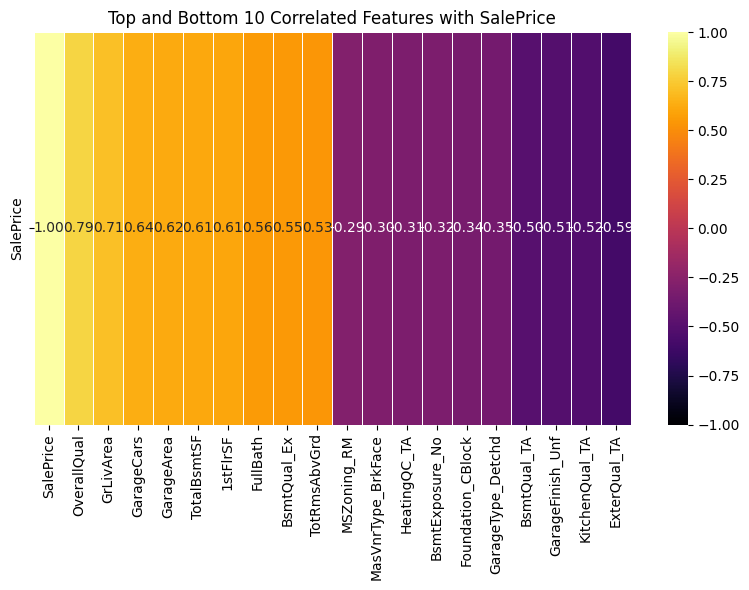

In [10]:
# 2.

# Plotting top and bottom 10 features correlates with SalePrice
# finding the correlation matrix
corr_matrix = df_train.corr()

# Selecting the correlation of features with the target variable 'SalePrice'
corr_features = corr_matrix['SalePrice'].sort_values(ascending=False)

# creating a subset of top 10 positively correlated and bottom 10 negatively correlated features
top_features = corr_features.head(10)
bottom_features = corr_features.tail(10)

# adding top and bottom correlated features for a heatmap
features = pd.concat([top_features, bottom_features])

# generating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(features.to_frame().T, annot=True, cmap='inferno', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Top and Bottom 10 Correlated Features with SalePrice')
plt.tight_layout()
plt.show()

Here based on my observation first I selected features with high positive correlation which represents the key attributes of the house that increases the sale prices, such as quality, size, and the number of rooms.

Some negatively correlated features are also important in identifying when certain conditions which decreases the value of the houses, and including them can help the model better capture the full range of sale price variation.

By selecting both highly positively correlated features and negatively correlated features, the regression model can account for both factors that increase and decrease the sale price, leading to a better accurate prediction.

In [11]:
# Selecting features based on high absolute correlation
selected_features = corr_features[abs(corr_features) > 0.5].index.tolist()
print("Features Based on Correlation:\n", selected_features)
selected_features.remove("SalePrice")

# Reduce training and validation data to selected features
X_train = X_train[selected_features]
X_val = X_val[selected_features]

# 3.
# initializing and training the model using selected features
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# 4.
# Evaluate model performance
r2 = r2_score(y_val, y_pred)
print("\nR-squared value:", r2)

Features Based on Correlation:
 ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'KitchenQual_Ex', 'GarageFinish_Unf', 'KitchenQual_TA', 'ExterQual_TA']

R-squared value: 0.828187953583166


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


***1.***

RoBERTa - Robustly Optimized BERT Pretraining Approach, is a transformer-based language model which is a advanced version of BERT by using more data, larger batch sizes, and longer training, making it more useful for a wide range of natural language tasks. In this code I used RoBERTa model for zero-shot classification of sentiment in user reviews.

Original pretraining data sources:

Its a transformer-based model, pretrained on a large corpus of text. Its original pretraining data sources are:
BooksCorpus, English Wikipedia, CC-News, OpenWebText.

Number of Parameters:

This roberta-base model has over 125 million parameters.

Fine-Tuning:

This model is not fine tuned for this task as this is a zero-shot classification.

In [2]:
# Write your code here

#2

import pandas as pd
from transformers import pipeline

# loading the dataset using pandas
userReviews = pd.read_csv('Annotated_UserReviews.csv')
print(userReviews.head(),"\n")

# initializing the zero-shot classification pipeline with RoBERTa
zeroShotClassifier = pipeline("zero-shot-classification", model="roberta-base")

# defining sentiment classes for the dataset
sentimentClasses = ['positive', 'negative', 'neutral']

# applying the classifier to each review
sentiments = userReviews['clean_text'].apply(lambda x: zeroShotClassifier(x, candidate_labels=sentimentClasses, hypothesis_template="This text is {}."))

# predicteding sentiment and sentiment scores
userReviews['predicted_sentiment'] = [sentiment['labels'][0] for sentiment in sentiments]
userReviews['sentiment_score'] = [sentiment['scores'][0] for sentiment in sentiments]

   document_id                                         clean_text sentiment
0            1  guardian galaxi volum chaotic weird oftentim r...  positive
1            2  sat phase film fail inspir guardian feel like ...  positive
2            3  ive want yeah joke bit silli tone bit confus t...  positive
3            4  lead back start great trilog indic past gotg s...  positive
4            5  point one trilog mcu excel start finish time a...  positive 



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


In [3]:
# resulted dataframe
userReviews.head()

,document_id,clean_text,sentiment,predicted_sentiment,sentiment_score
0,1,guardian galaxi volum chaotic weird oftentim r...,positive,positive,0.333371
1,2,sat phase film fail inspir guardian feel like ...,positive,neutral,0.333479
2,3,ive want yeah joke bit silli tone bit confus t...,positive,positive,0.333397
3,4,lead back start great trilog indic past gotg s...,positive,neutral,0.333469
4,5,point one trilog mcu excel start finish time a...,positive,negative,0.333426


In [4]:
# importing evaluation metrics from scikit-learn:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# metrics using 'weighted' average to account for label imbalance
accuracy = accuracy_score(userReviews['sentiment'], userReviews['predicted_sentiment'])
precision = precision_score(userReviews['sentiment'], userReviews['predicted_sentiment'], average='weighted')
recall = recall_score(userReviews['sentiment'], userReviews['predicted_sentiment'], average='weighted')
f1 = f1_score(userReviews['sentiment'], userReviews['predicted_sentiment'], average='weighted')

print(f"Accuracy:           {accuracy}")
print(f"Weighted Precision: {precision}")
print(f"Weighted Recall:    {recall}")
print(f"Weighted F1 Score:  {f1}")

Accuracy:           0.451
Weighted Precision: 0.8318845530311679
Weighted Recall:    0.451
Weighted F1 Score:  0.5759541204838605


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***3.***

Advantages:
- RoBERTa has better performance compared to BERT on various NLP tasks because of longer training, more data, and larger batch sizes.
- This model can classify text into predefined categories without task-specific fine-tuning, making it highly flexible.
- Pretrained on diverse text sources, RoBERTa generalizes well across domains, even on unseen tasks

Disadvantages:
- Large model sizes require significant computational resources for both training and inference.
- Without fine-tuning for specific tasks, RoBERTa may not achieve the highest accuracy.
- The large number of parameters makes RoBERTa slow and inefficient for deployment on resource-constrained environments.

Challenges:

One of the major challenges was classifying neutral sentiments. Neutral sentiments are difficult to distinguish from either positive or negative sentiments.

The model required significant amount of time and best computational resources to run effectively. This led to increased processing time, especially when dealing with large-scale sentiment analysis.